# Model Applications
In this notebook, we will be applying our previously trained model to some real world data.

1. Import packages
2. Helper functions
3. Testing
4. Results

## 1. Import packages

In [91]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
import keras
from keras.applications import inception_v3
from keras.models import load_model
from keras.preprocessing import image

## 2. Helper functions

In [114]:
def read_img_paths(folder):
    '''
    This function will read a folder containing images and return a list of filenames.
    
    args:
        folder - path of folder containing images
    output:
        filepaths - list of image filenames in folder
    '''
    filepaths = []

    for path, subdirs, files in os.walk(folder):
        for name in files:
            filepaths.append(os.path.join(path,name))
            
    print(len(imgs), 'images read')
            
    return filepaths

In [95]:
def prepare_image(img_path):
    '''
    This function will read an image and prepare it for use in Keras
    
    args:
        img_path - file path of image
        
    output:
        x - processed image file, ready to be used in Keras
        img - raw image file
    '''
    img = image.load_img(img_path,target_size=(299,299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inception_v3.preprocess_input(x)
    
    return x, img

## 3. Testing
The test folder contains 17 images taken using a mobile phone camera reflecting my real food intake over the course of several days.

In [115]:
# path of image folder
folder = 'data/phone'

# get file names of images
imgs = read_img_paths(folder)

17 images read


In [108]:
# Food category labels transferred from model
labels = ['Dairy/Egg','Dessert','Fried','Fruit/Veg','Grains','Meat','Seafood','Soup']

In [98]:
# loading image classifier model
model = load_model('data/model_cat2_4')

Food Item: Apple
Predicted: Fruit/Veg
Probability: 99.24%


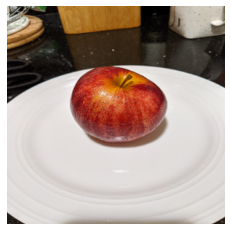

Food Item: Tomatoes
Predicted: Fried
Probability: 68.60%


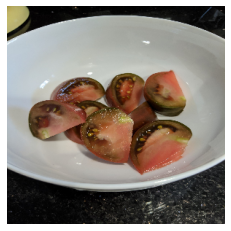

Food Item: Bulgolgi
Predicted: Meat
Probability: 92.69%


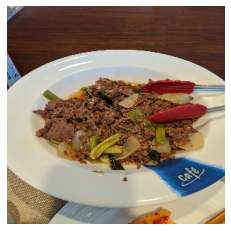

Food Item: Kimchi
Predicted: Dairy/Egg
Probability: 70.46%


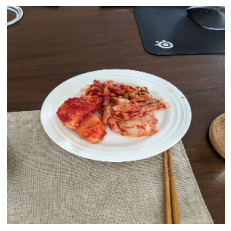

Food Item: Oatmeal
Predicted: Grains
Probability: 96.47%


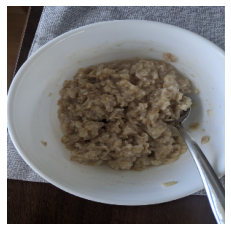

Food Item: Beef Noodle Soup
Predicted: Meat
Probability: 66.49%


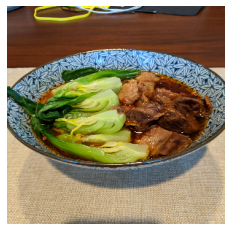

Food Item: Grilled Cheese
Predicted: Grains
Probability: 45.07%


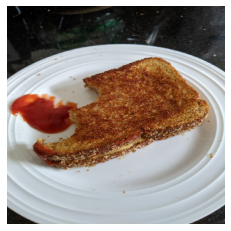

Food Item: Pizza
Predicted: Dairy/Egg
Probability: 50.22%


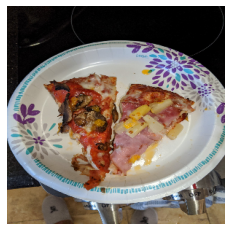

Food Item: Soybean Stew
Predicted: Soup
Probability: 38.80%


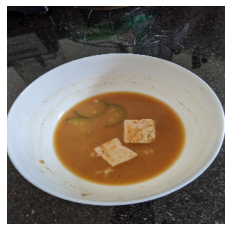

Food Item: Beef Soup
Predicted: Soup
Probability: 81.43%


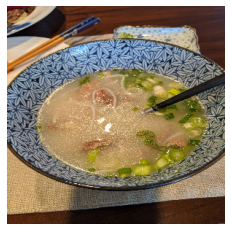

Food Item: Tonkatsu
Predicted: Fried
Probability: 39.24%


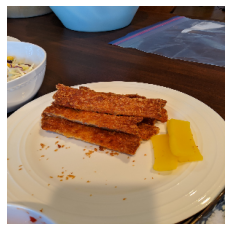

Food Item: Rice
Predicted: Grains
Probability: 99.82%


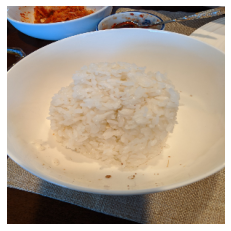

Food Item: Garlic Bread
Predicted: Grains
Probability: 74.14%


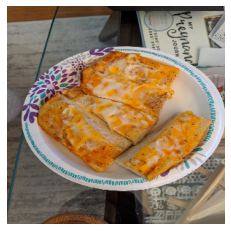

Food Item: Popcorn Chicken
Predicted: Fried
Probability: 37.67%


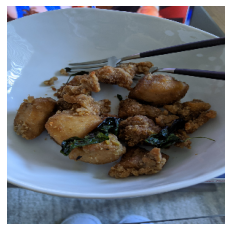

Food Item: Sandwich
Predicted: Grains
Probability: 92.49%


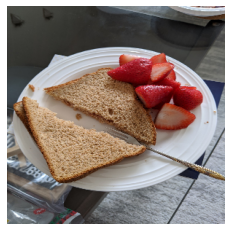

Food Item: Lettuce
Predicted: Fruit/Veg
Probability: 99.89%


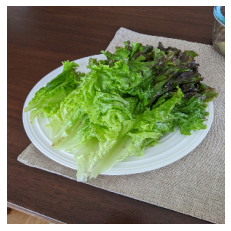

Food Item: Rice-2
Predicted: Grains
Probability: 99.97%


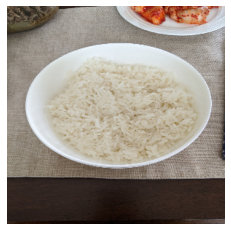

In [131]:
food_summary = np.zeros(len(labels))

for img_file in imgs:
    name = img_file.split('/')[2].split('.')[0]
    img_array, img_pic = prepare_image(img_file)
    out = model.predict(img_array)

    food_summary[out.argmax(axis=1)[0]] += 1
    print('Food Item:', name)
    print('Predicted:', labels[out.argmax(axis=1)[0]])
    print('Probability:', "{:.2f}%".format(100*max(out[0])))
    plt.imshow(img_pic)
    plt.axis('off')
    plt.show()

## 4. Results

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

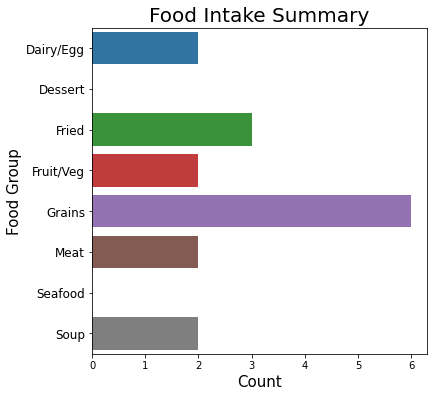

In [122]:
# Displaying aggregated food counts
plt.figure(figsize=(6,6))
sns.barplot(food_summary, labels)
plt.title('Food Intake Summary', fontsize=20)
plt.ylabel('Food Group', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [132]:
# Creating vectors for different dietary patterns
diets = ['Pescatarian','Vegetarian','Vegan','Mediterranean','Keto','Eat All The Foods']

diet_vect = np.array([[2,1,1,5,5,-2,2,1],
                    [3,1,1,7,6,-2,-2,1],
                    [-2,1,1,9,9,-2,-2,1],
                    [2,0,0,4,4,1,3,1],
                    [4,-2,-2,5,-2,6,5,1],
                    [2,2,2,2,2,2,2,1]])

diet_vect

array([[ 2,  1,  1,  5,  5, -2,  2,  1],
       [ 3,  1,  1,  7,  6, -2, -2,  1],
       [-2,  1,  1,  9,  9, -2, -2,  1],
       [ 2,  0,  0,  4,  4,  1,  3,  1],
       [ 4, -2, -2,  5, -2,  6,  5,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  1]])

In [133]:
# Calculating cosine similarity between observed food counts and different diet patterns
diet_sim = cosine_similarity(food_summary.reshape(1,-1), diet_vect)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

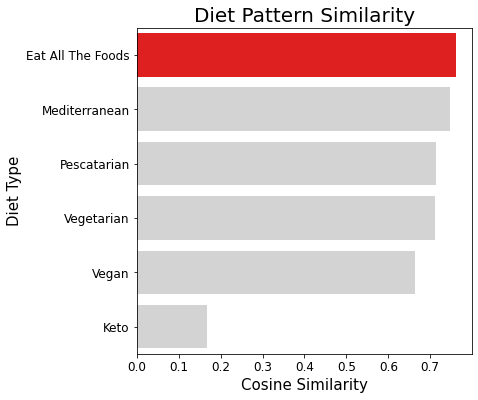

In [134]:
# Displaying similarity results

df = pd.DataFrame()
df['diet_pattern'] = diets
df['similarity'] = diet_sim[0]
df_sort = df.sort_values('similarity', ascending=False)

clrs = ['lightgray' if (x < max(df_sort['similarity'])) else 'red' for x in df_sort['similarity'] ]
plt.figure(figsize=(6,6))

sns.barplot(data=df_sort, x='similarity', y='diet_pattern', palette=clrs)
plt.title('Diet Pattern Similarity', fontsize=20)
plt.ylabel('Diet Type',fontsize=15)
plt.xlabel('Cosine Similarity',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)